In [17]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from os import listdir

In [18]:

def donut_to_image(background, donut, x, y):
    copy = background.copy()
    for x_d in range(donut.shape[0]):
        for y_d in range(donut.shape[1]):
            try:
                if (donut[x_d, y_d] != np.array([255,255,255])).any():
                    copy[x+x_d, y+y_d] = donut[x_d, y_d]
            except:
                pass
    return copy

In [19]:
def random_donut(n, back, donut):
    N = int(np.random.randint(low = 1, high = n, size = 1))
    copy_b = back.copy()

    sp = []

    for _ in range(N):
        x, y = np.random.randint(low = 0, high = 400, size = 2)
        width, height = np.random.randint(low = 40, high=150, size = 2)
        res_don = cv2.resize(donut, (width, width), cv2.INTER_NEAREST)
        copy_b = donut_to_image(copy_b, res_don, x, y)

        sp.append([x, y, x+width, y+width])
    
    return copy_b, sp

In [20]:
path = 'D:/YOLOv3/images/background/'

donut = cv2.imread(r'D:\YOLOv3\images\donut.png')

dicti = {'IMG':[],'COOR':[]}

for ind, img in enumerate(listdir(path)):
    win = cv2.imread(path+img)
    win = cv2.resize(win, (512, 512), cv2.INTER_NEAREST)
    print(ind)
    for ind in range(50):
        data = random_donut(7, win, donut)

        dicti['IMG'].append(data[0])
        dicti['COOR'].append(data[1])

df = pd.DataFrame(dicti)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [35]:
df['COOR'] = df['COOR'].map(lambda x: np.array(x))

[[ 92 191 196 295]
 [251  69 348 166]
 [163 308 284 429]]
<class 'numpy.ndarray'>


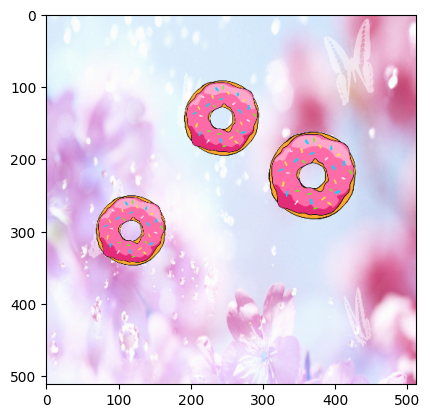

In [38]:
test_ind = 60
plt.imshow(df.loc[test_ind,'IMG'][:,:,::-1])
print(df.loc[test_ind,'COOR'])
print(type(df.loc[test_ind,'COOR']))

In [39]:
df_array = np.array(df)

In [42]:
np.save('D:/YOLOv3/data/main_data', df_array)